In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas, numpy
import os
from IPython.display import display, HTML
import datetime, calendar
from plotly import express
import plotly.graph_objects as go
import matplotlib.pyplot as fdmp, seaborn as fdse
from sklearn import metrics, decomposition, utils, model_selection, pipeline,preprocessing, feature_selection
from sklearn import ensemble, tree, svm, neural_network, linear_model

# READING DATASET

In [3]:
FDT=pandas.read_csv("Food_Time_Data_Set.csv")
FDT=FDT.drop("Unnamed: 14", axis=1)
FDT.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.45


# DATA CLEANING

In [4]:
def FetFormulation(fooddf):
    TrArr=numpy.array(fooddf['TARGET'])
    new_arr = numpy.where(TrArr == '#VALUE!', numpy.nan, TrArr) 
    new_arr = numpy.where(new_arr == '#N/A', numpy.nan, new_arr) 
    fooddf['TARGET']=new_arr
    fooddf['TARGET']=numpy.array(fooddf['TARGET'],float)
    print("==========================================")
    print("      Data Infomation")
    print("==========================================")
    print(fooddf.info())
    print("===================================================")
    print("Missing Values Before Cleaning")
    print("===================================================")
    print(fooddf.isnull().sum())
    smfd=sum(fooddf.isnull().sum())
    if smfd>0:
        fdob=fooddf.dtypes[fooddf.dtypes=='object'].index.tolist()
        fdnm=fooddf.dtypes[fooddf.dtypes!='object'].index.tolist() 
        if sum(fooddf.isna().sum())!=0:
            for x in fdob:
                fooddf[x]=fooddf[x].fillna(fooddf[x].mode()[0])
            for y in fdnm:
                fooddf[y]=fooddf[y].fillna(fooddf[y].mean())
        print("===================================================")
        print("      Missing Values (After Cleaning)")
        print("===================================================")
        print(fooddf.isnull().sum())
    else:
        print("===================================================")
        print("      Data has no Missing Values ")
        print("===================================================")
    return fooddf
FDTMS=FetFormulation(FDT)

      Data Infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  float64
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  temperature                  9995 non-null   float64
 11  humidity                     9995 non-null   float64
 12  precipitation                9995 non-null   float64

## EDA

In [6]:
FDTMS.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,14.292747,21.666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.170000,85.266667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.340000,28.583333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.050000,35.183333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.890000,43.450000


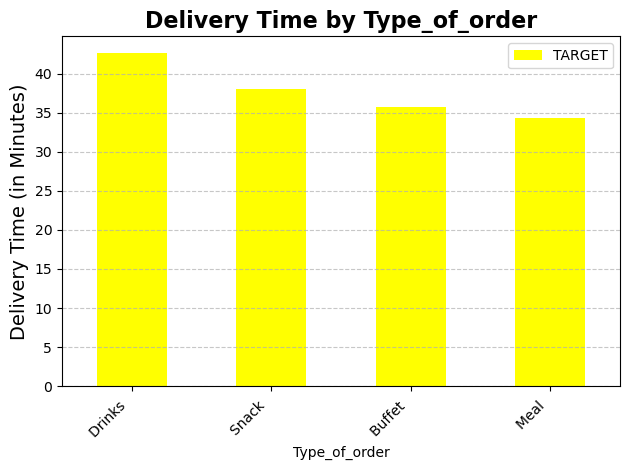

,TARGET
Type_of_order,
Drinks,42.630232
Snack,38.011945
Buffet,35.660937
Meal,34.272924


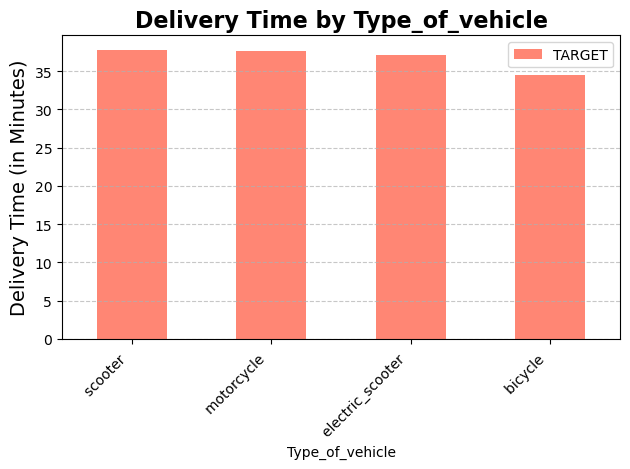

,TARGET
Type_of_vehicle,
scooter,37.805800
motorcycle,37.663809
electric_scooter,37.077795
bicycle,34.527541


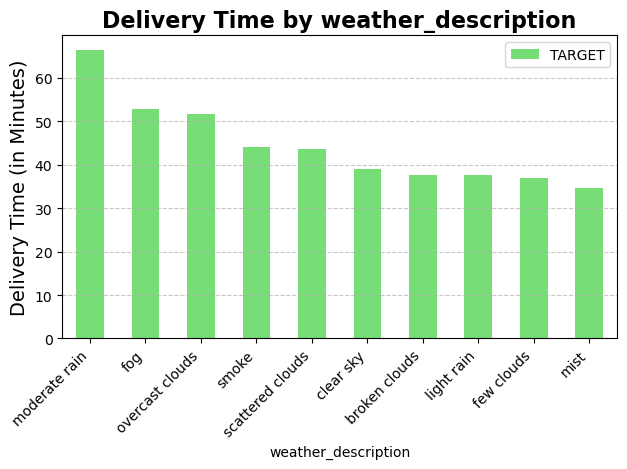

,TARGET
weather_description,
moderate rain,66.450000
fog,52.701020
overcast clouds,51.699677
smoke,44.119435
scattered clouds,43.676077
clear sky,39.087979
broken clouds,37.713559
light rain,37.656750
few clouds,36.987500


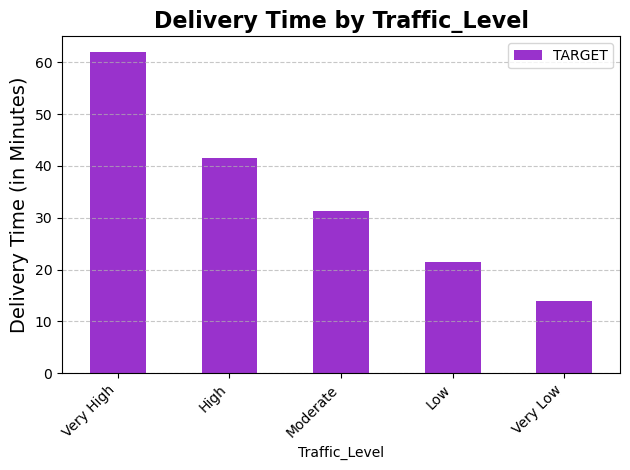

,TARGET
Traffic_Level,
Very High,61.929136
High,41.469617
Moderate,31.356593
Low,21.471835
Very Low,13.890849


In [7]:
fetssls=['Type_of_order','Type_of_vehicle','weather_description','Traffic_Level']
pltclrs=['#FFFF00','#FF8674','#77DD77','#9932CC']
for f in range(len(fetssls)):
    gbdt=FDTMS.groupby(fetssls[f])['TARGET'].mean().to_frame().sort_values(by=['TARGET'],ascending=False).head(10)
    gbdt.plot(kind='bar',color=pltclrs[f])
    fdmp.title('Delivery Time by {}'.format(fetssls[f]), fontsize=16, weight='bold')
    fdmp.ylabel('Delivery Time (in Minutes)', fontsize=14)
    fdmp.grid(True, axis='y', linestyle='--', alpha=0.7)
    fdmp.xticks(rotation=45, ha="right")
    fdmp.legend()
    fdmp.tight_layout()
    fdmp.show()
    display(HTML(gbdt.to_html()))